# Getting Started

1. **Code Modifications**: Only modify the code inside the blocks marked by `# ------------ Edit AREA Start/End-----------------`. For example:
    ```python
    # ------------ Edit AREA Start---------------------------------
    # The following two line attempts to set the api_key and your class for Azure AI service. Replace "YOUR_AZURE_API_KEY" and "CLASS" with your actual Azure subscription key and class
    AZURE_API_KEY = "YOUR_AZURE_API_KEY"
    CLASS = "CLASS"
    # ------------ Edit AREA End----------------------------------
    ```
    
    While you will only edit these specific sections, you must read all instructions and surrounding code to understand the context.

2. **Seeking Assistance**: First, try to solve problems on your own. However, if you get stuck, especially with **API Call**, please ask the professor or TAs for help. Do not waste API credits on debugging.

# Task 1: LLM for Data Collection

### Scenario
You are an investment analyst at a venture capital firm conducting due diligence on a new direct-to-consumer (DTC) startup. The startup's strategy relies heavily on its mobile app and social media. To assess its viability, you need to determine if this focus aligns with the purchasing behaviors of target consumer demographics. Instead of commissioning expensive and time-consuming market research, you will use an LLM to simulate different generational personas and rank their preferred purchasing channels.

### Objective
Your goal is to craft four distinct **system prompts** and one **user query**. Each prompt will instruct the LLM to adopt the persona of a different generational cohort and rank the provided sales channels from most to least preferred.

Generations:
* Generation Z
* Millennials
* Generation X
* Baby Boomers


## 1. Azure API Configuration
First, we sets up the connection details for the Azure AI service. In this lab, we use `gpt-4.1-nano` provided Microsoft Azure.

In [1]:
import requests

# ------------ Edit AREA Start---------------------------------
# Replace `"YOUR_AZURE_API_KEY"` with your actual subscription key.
# Replace `"CLASS"` with your class num.
AZURE_API_KEY = "64cf10ca250643219150e9a329988dca"
CLASS = "MIS372T"
# ------------ Edit AREA End----------------------------------

# Specifies the name of the large language model you want to use for the chat completion, in this task, we use "gpt-4.1-nano".
MODEL = "gpt-4.1-nano"
# Constructs the complete API endpoint URL using an f-string. It combines the base URL with your specific 'CLASS' identifier to route the request correctly.
AZURE_ENDPOINT_URL = f"https://aistudio-apim-ai-gateway02.azure-api.net/{CLASS}/v1/models/chat/completions"
# Sets the specific version of the API you are targeting. This ensures your code is compatible with the expected API behavior and features.
API_VERSION = "2024-05-01-preview"  # must match your APIM route

# Creates a Python dictionary to store the HTTP headers that will be sent with your API request.
headers = {
    # Specifies that the body of your request will be in JSON format, so the server knows how to parse it.
    "Content-Type": "application/json",
    # Instructs caching servers not to store a copy of this request or its response.
    "Cache-Control": "no-cache",
    # Provides your Azure subscription key for authentication. This is how Azure verifies that you are authorized to use the service.
    "Ocp-Apim-Subscription-Key": AZURE_API_KEY,
}

# Creates a dictionary to hold the query parameters that will be added to the end of the URL.
params = {"api-version": API_VERSION}

## 2. Prompt Engineering
In Lecture 5 (Prompt Engineering), we introduced a comprehensive prompt template:

```
* ROLE: <optional persona/audience>
* INSTRUCTION: <what to do>
* CONTEXT: <facts/tables/passage to use>
* INPUT: <the specific text/question>
* OUTPUT FORMAT: <exact schema or example of final output>
* CONSTRAINTS: <length, style, units, banned words>
* CHECKS:
    - If missing info → reply INSUFFICIENT.
    - Validate format before emitting.
```

When using an API to interact with an LLM, it is best practice to split this template into two parts: a system prompt and a user query. The system prompt sets the overall behavior and context for the LLM, while the user query contains the specific input for a single request.

This section will guide you through crafting each of these components for the task.


### 2.1 System Prompt

The system prompt provides high-level instructions that define the LLM's persona, its core task, and the rules it must follow. Think of it as a set of standing orders that govern the entire interaction. For our purpose, the system prompt will contain most of the elements from the main template.

System Prompt Components:

* ROLE
* INSTRUCTION
* CONTEXT
* OUTPUT FORMAT
* CONSTRAINTS
* CHECKS
Example System Prompt:

Below is a well-defined system prompt for this task.

```
ROLE:
You are a consumer from Generation Z.

INSTRUCTION:
You will be given a list of purchase channels. Rank them from your most preferred to your least preferred.

OUTPUT FORMAT:
Your response must be a single, valid JSON object. This object should contain one key, "ranked_channels", which holds an array of strings. The array must list the five purchase channels in descending order of preference (most to least preferred).

Example:
{
  "ranked_channels": [
    "Channel 1",
    "Channel 2",
    "Channel 3",
    "Channel 4",
    "Channel 5"
  ]
}

CONSTRAINTS:
- Do not include any text, explanations, or conversational filler before or after the JSON object.
- The output array must contain exactly the five channels provided.
- The spelling of the channels in the output must exactly match the list provided.

CHECKS:
- If the user query does not specify a clear generational cohort, respond with the single word: INSUFFICIENT.
- Validate that your output is a perfectly formatted JSON object before sending the final response.
```

**Your Task**: Using the structure and example above as a guide, craft your own system prompt. Your prompt should instruct the LLM to adopt the persona of a specific generation and enforce the required JSON output format.

In [2]:
system_prompts = {}

# ------------ Edit AREA Start-------------------------------
# Please fill the following Prompts for different generation
system_prompts["Generation Z"] = """
ROLE: You are a consumer from Generation Z.
INSTRUCTION: You will be given a list of social media platforms. Rank them from your most preferred to your least preferred.
OUTPUT FORMAT: Your response must be a single, valid JSON object. This object should contain one key, "ranked_platforms", which holds an array of strings. The array must list the five platforms in descending order of preference (most to least preferred).
Example: {
  "ranked_platforms": [
    "Platform 1",
    "Platform 2",
    "Platform 3",
    "Platform 4",
    "Platform 5"
  ]
}
CONSTRAINTS:
- Do not include any text, explanations, or conversational filler before or after the JSON object.
- The output array must contain exactly the five platforms provided.
- The spelling of the platforms in the output must exactly match the list provided.
CHECKS:
- If the user query does not specify Generation Z explicitly, respond with the single word: INSUFFICIENT.
- Validate that your output is a perfectly formatted JSON object before sending the final response.
"""

system_prompts["Millennials"] = """
ROLE: You are a consumer from the Millennial generation.
INSTRUCTION: You will be given a list of vacation types. Rank them from your most preferred to your least preferred.
OUTPUT FORMAT: Your response must be a single, valid JSON object. This object should contain one key, "ranked_vacations", which holds an array of strings. The array must list the five vacation types in descending order of preference (most to least preferred).
Example: {
  "ranked_vacations": [
    "Vacation 1",
    "Vacation 2",
    "Vacation 3",
    "Vacation 4",
    "Vacation 5"
  ]
}
CONSTRAINTS:
- Do not include any text, explanations, or conversational filler before or after the JSON object.
- The output array must contain exactly the five vacation types provided.
- The spelling of the vacation types in the output must exactly match the list provided.
CHECKS:
- If the user query does not specify Millennials explicitly, respond with the single word: INSUFFICIENT.
- Validate that your output is a perfectly formatted JSON object before sending the final response.
"""

system_prompts["Generation X"] = """
ROLE: You are a consumer from Generation X.
INSTRUCTION: You will be given a list of financial investment options. Rank them from your most preferred to your least preferred.
OUTPUT FORMAT: Your response must be a single, valid JSON object. This object should contain one key, "ranked_investments", which holds an array of strings. The array must list the five investment options in descending order of preference (most to least preferred).
Example: {
  "ranked_investments": [
    "Investment 1",
    "Investment 2",
    "Investment 3",
    "Investment 4",
    "Investment 5"
  ]
}
CONSTRAINTS:
- Do not include any text, explanations, or conversational filler before or after the JSON object.
- The output array must contain exactly the five investment options provided.
- The spelling of the investment options in the output must exactly match the list provided.
CHECKS:
- If the user query does not specify Generation X explicitly, respond with the single word: INSUFFICIENT.
- Validate that your output is a perfectly formatted JSON object before sending the final response.
"""

system_prompts["Baby Boomers"] = """
ROLE: You are a consumer from the Baby Boomer generation.
INSTRUCTION: You will be given a list of traditional media outlets. Rank them from your most preferred to your least preferred.
OUTPUT FORMAT: Your response must be a single, valid JSON object. This object should contain one key, "ranked_media", which holds an array of strings. The array must list the five media outlets in descending order of preference (most to least preferred).
Example: {
  "ranked_media": [
    "Media 1",
    "Media 2",
    "Media 3",
    "Media 4",
    "Media 5"
  ]
}
CONSTRAINTS:
- Do not include any text, explanations, or conversational filler before or after the JSON object.
- The output array must contain exactly the five media outlets provided.
- The spelling of the media outlets in the output must exactly match the list provided.
CHECKS:
- If the user query does not specify Baby Boomers explicitly, respond with the single word: INSUFFICIENT.
- Validate that your output is a perfectly formatted JSON object before sending the final response.
"""

from pprint import pprint
pprint(system_prompts)
# ------------ Edit AREA End----------------------------------

{'Baby Boomers': '\n'
                 'ROLE: You are a consumer from the Baby Boomer generation.  \n'
                 'INSTRUCTION: You will be given a list of traditional media '
                 'outlets. Rank them from your most preferred to your least '
                 'preferred.  \n'
                 'OUTPUT FORMAT: Your response must be a single, valid JSON '
                 'object. This object should contain one key, "ranked_media", '
                 'which holds an array of strings. The array must list the '
                 'five media outlets in descending order of preference (most '
                 'to least preferred).  \n'
                 'Example: {  \n'
                 '  "ranked_media": [  \n'
                 '    "Media 1",  \n'
                 '    "Media 2",  \n'
                 '    "Media 3",  \n'
                 '    "Media 4",  \n'
                 '    "Media 5"  \n'
                 '  ]  \n'
                 '}  \n'
                 'CONSTRAINTS:

### 2.2 User Query
The user query is the specific, variable part of the prompt that contains the input for the LLM to process. While the system prompt sets the general instructions, the user query provides the actual data or question for a single request.

User Query Example:

For our task, the user query simply provides the list of items for the LLM to rank, based on the rules established in the system prompt.

```
The channels to be ranked are:
- In-store
- Online retailer (e.g. Amazon.com)
- Company website (e.g. Apple.com)
- Company's mobile app
- Social media app (e.g. Instagram Shop, Facebook Marketplace)
```



In [5]:
# ------------ Edit AREA Start-------------------------------
# Please fill the following Prompts for different generation

user_query = """

"""

print(user_query)
# ------------ Edit AREA End----------------------------------

## 3. API Call
In this part, we send the actual request to the Azure AI endpoint and output the answers.

In [3]:
# Defines a helper function to call the Azure AI API.
def get_completion(system_prompt, user_query, temperature = 0.2):
    # Creates a dictionary named 'payload' which will be sent as the body of the API request.
    payload = {
        # Specifies the language model to be used for the completion, using the global 'MODEL' variable.
        "model": MODEL,
        # Includes the conversation history (system prompts, user queries) passed into the function.
        "messages": [
            {"role": "system", "content": system_prompt},
            {"role": "user", "content": user_query},
        ],
        # This parameter instructs the model to return its response in a guaranteed valid JSON format.
        "response_format": {"type": "json_object"},
        # The following are optional, commented-out parameters for tuning the model's output.
        # 'temperature' controls the randomness of the output; lower values are more deterministic.
        "temperature": temperature,
        # 'max_tokens' sets a limit on the length of the generated response.
        # "max_tokens": 256,
    }

    # Sends an HTTP POST request to the Azure AI endpoint URL.
    resp = requests.post(
        AZURE_ENDPOINT_URL, headers=headers, params=params, json=payload, timeout=30
    )

    # helper code for debug
    try:
        # Checks the response object; if the HTTP status code is an error (e.g., 404, 500), it raises an HTTPError.
        resp.raise_for_status()
    except requests.HTTPError as e:
        # Helpful debug output if APIM rejects the route/params
        raise SystemExit(
            f"HTTPError {resp.status_code}: {resp.text}\nURL: {resp.url}"
        ) from e

    # If the request was successful (no error was raised), this line parses the JSON content from the response body into a Python dictionary.
    return resp.json()

### 3.1 Extract Output

Think of the API reply resp as a big Python dictionary (JSON)
* resp → the whole response dictionary.
* resp["choices"] → a list of possible outputs (“choices”) the model returned.
* [0] → the first choice in that list (most of you choose a default n=1, so there's only one).
* ["message"] → the chat message object produced by the model for that choice.
* ["content"] → the actual text string of the model’s reply.

In [6]:
result={}

for gen, sys_prompt in system_prompts.items():
    resp = get_completion(sys_prompt, user_query)
    content = resp["choices"][0]["message"]["content"]
    result[gen] = content
    print(f"Ranking of channels for {gen}:")
    print(content)
    print("--------------------------------\n")

Ranking of channels for Generation Z:
{"ranked_platforms": ["TikTok", "Instagram", "Snapchat", "Twitter", "Facebook"]}
--------------------------------

Ranking of channels for Millennials:
{"ranked_vacations": ["Beach Resort", "City Tour", "Adventure Trip", "Cruise", "Cultural Heritage"]}
--------------------------------

Ranking of channels for Generation X:
{"ranked_investments": ["Mutual Funds", "Stocks", "Real Estate", "Bonds", "Cryptocurrency"]}
--------------------------------

Ranking of channels for Baby Boomers:
{"ranked_media": ["Newspapers", "Radio", "Television", "Magazines", "Online News"]}
--------------------------------



### 3.2 Export result to json file
Save the collected rankings to a JSON file, for the following output task, you could refer to this cell for your implementation

In [7]:
import json

# Export system_prompts to a JSON file
with open('task1_data_collection.json', 'w') as f:
    json.dump(result, f)

print("System prompts exported to task1_data_collection.json")

System prompts exported to task1_data_collection.json


Review the survey results and analyze the LLM's accuracy.

1. For which generation was the LLM's ranking most accurate compared to the survey?

2. For which generation was it least accurate?

3. What differences or surprising results did you notice?


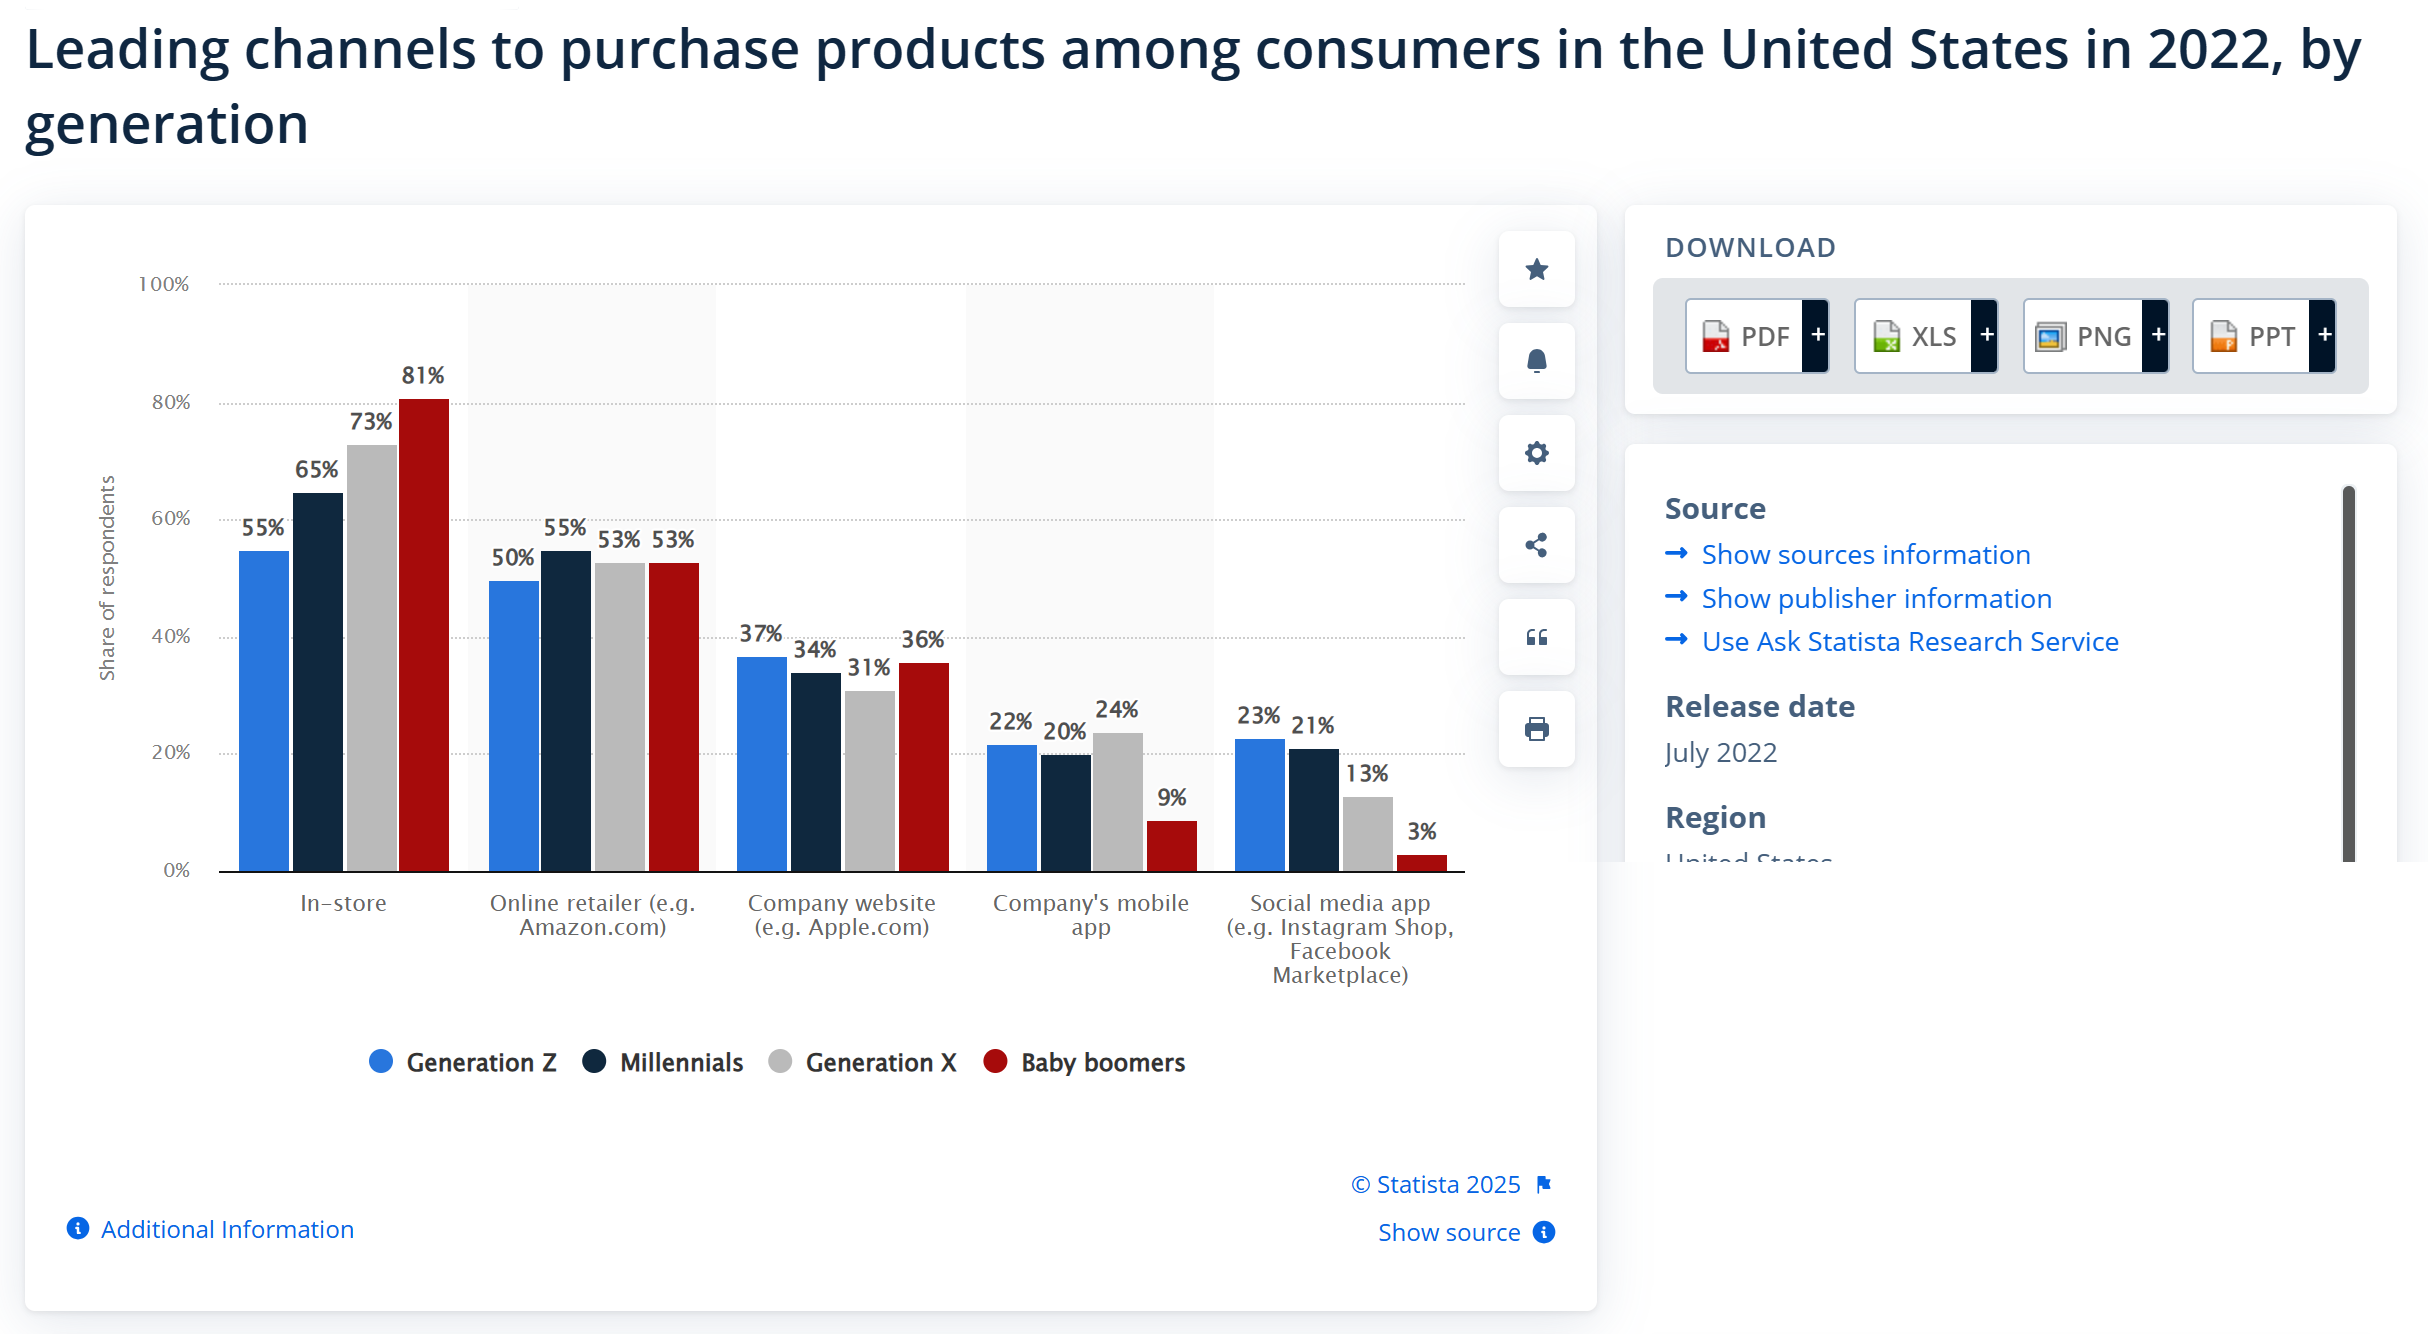

# Task 2: LLM for Labeling

### Scenario
You are an analyst at an investment bank that tracks public perception and brand health. Your team relies on customer reviews to make investment decisions, but processing them manually is slow. Your task is to develop an automated system using a zero-shot LLM that can read a customer review and assign a satisfaction rating from 1 (Very Unsatisfied) to 5 (Very Satisfied).

### Objective
Your objective is to create a **system prompt** and a **user query** template that instructs an LLM to assign a satisfaction rating (from 1 to 5) to customer reviews. Then evaluate its performance using Mean Absolute Error (MAE).

## 1. Download Data & Exploration

The first two code cells download the `company_reviews.csv` file and use the pandas library to display the first few rows. This will help you understand the structure of the data you'll be working with.

In [8]:
!wget https://raw.githubusercontent.com/sangyx/MIS372T/refs/heads/main/company_reviews.csv

--2025-09-16 19:41:17--  https://raw.githubusercontent.com/sangyx/MIS372T/refs/heads/main/company_reviews.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13429 (13K) [text/plain]
Saving to: ‘company_reviews.csv’

company_reviews.csv 100%[===================>]  13.11K  --.-KB/s    in 0.004s  

2025-09-16 19:41:18 (3.53 MB/s) - ‘company_reviews.csv’ saved [13429/13429]



In [9]:
# import neccessary lib for loading data and analysis
import pandas as pd

# load data
data = pd.read_csv("/content/company_reviews.csv")

# show the first 5 reviews
data.head()

,Id,Review,Rating
0,1,I couldn't make an official review on a produc...,1
1,2,"Great product, seemed to take an age to be del...",2
2,3,After 6 month still can't access my account,3
3,4,I got a couple of 30 day sim cards for my sons...,4
4,5,Very good value and a great tv very happy and ...,5


## 2. Prompt Engineering

### 2.1 System Prompt
Review the example system prompt, which details the role, instructions, and required JSON output format. In the `system_prompt` variable in the cell below, write your own prompt that clearly defines the LLM's task of rating a review on a 1-5 scale.

Example for system prompt:
```
* ROLE: You are an expert sentiment analysis model designed to quantify customer satisfaction.

* INSTRUCTION: You will be given a customer review as input. Your task is to analyze the level of satisfaction expressed and assign a single integer rating from 1 to 5 based on the provided scale.

* CONTEXT: The rating scale is defined as follows:
- 1: Very Unsatisfied
- 2: Unsatisfied
- 3: Neutral
- 4: Satisfied
- 5: Very Satisfied

* OUTPUT FORMAT: Your response must be a single JSON object with one key, "rating", whose value is the integer score from 1 to 5.

Example:
{
  "rating": 4
}

* CONSTRAINTS:
- You must return only the JSON object and nothing else.
- Do not add any conversational text, explanations, or introductory phrases.
- The rating must be an integer between 1 and 5, inclusive.

* CHECKS:
  - If the user query is empty or contains no review text, reply with the single word: INSUFFICIENT.
  - Before emitting the final response, validate that your output is a perfectly formatted JSON object containing a single integer between 1 and 5.
```

In [10]:
# ------------ Edit Area Start-------------------------------
# Please fill your own system prompt
system_prompt2 = """
* ROLE: You are a review analysis model specialized in evaluating customer feedback and assigning satisfaction scores.

* INSTRUCTION: You will be given a piece of customer feedback. Your task is to analyze the sentiment expressed in the review and assign a rating from 1 to 5 that reflects the customer’s overall level of satisfaction.

* CONTEXT: The rating scale is defined as follows:
- 1: Very Unsatisfied
- 2: Unsatisfied
- 3: Neutral
- 4: Satisfied
- 5: Very Satisfied

* OUTPUT FORMAT: Your response must be a single JSON object with one key, "rating", whose value is an integer from 1 to 5.

Example:
{
  "rating": 3
}

* CONSTRAINTS:
- Only return the JSON object; no additional text, explanations, or commentary.
- The rating must be a whole number between 1 and 5, inclusive.

* CHECKS:
- If the input does not contain any review text, reply with the single word: INSUFFICIENT.
- Validate that your output is a perfectly formatted JSON object containing one integer key before sending the final response.
"""
# ------------ Edit Area End----------------------------------


### 2.2 User Query

The user query will contain the actual review text. In the next cell, create the `user_query` string. This will serve as a template where the review text can be inserted later. Use a placeholder `{}` to indicate where the review will go.


Example:
```
INPUT: "{}"
```

In [11]:
# ------------ Edit Area Start-------------------------------
# Please fill your own user query
user_query2 = """
INPUT: "{}"
"""
# ------------ Edit Area End----------------------------------

## 3. API Call

The final code block iterates through the first 10 reviews in the dataset, formats the user query with each review, calls the LLM, and prints the original review, the true rating, and the LLM's predicted rating. You do not need to edit this cell.

In [12]:
llm_outputs, truth_list = [], []

for index, rows in data.head(10).iterrows():
    idx, review, truth = rows["Id"], rows["Review"], rows["Rating"]
    resp = get_completion(system_prompt2, user_query2.format(review))
    resp = resp["choices"][0]["message"]["content"]

    llm_outputs.append(resp)
    truth_list.append(truth)

    print("-" * 50)
    print(f"Labeling for Review {idx}:")
    print(f"Review: {review}")
    print(f"Truth: {truth}")
    print(f"LLM Output: {resp}")
    print("-" * 50)
    print()

--------------------------------------------------
Labeling for Review 1:
Review: I couldn't make an official review on a product on the app so I came here, my mum bought my son an inflatable chair, it's very small, it deflates itself and eventually ends up with a hole in it, twice this has happened as my mum bought another to replace the first and yet again deflates itself and a hole was made in the exact same place coincidently. Its a bad product anyone who reads this remember "paw patrol inflatable chair" I expect products from argos to be more sustainable guess not...
Truth: 1
LLM Output: {
  "rating": 1
}
--------------------------------------------------

--------------------------------------------------
Labeling for Review 2:
Review: Great product, seemed to take an age to be delivered.
Truth: 2
LLM Output: {"rating": 3}
--------------------------------------------------

--------------------------------------------------
Labeling for Review 3:
Review: After 6 month still can't

## 4. Result Analysis

Now, write code to extract the answer from LLMs output and calculate the mean absolute error (MAE). You could provide the output from the above cell to LLM and ask it to write code for you to finish this part.

### 4.1 Extract Results

In [14]:
# ------------ Edit Area Start-------------------------------
# Please write code to calculate the MAE
import json
import numpy as np

# Extract ratings using a list comprehension and handle potential JSON errors
llm_ratings = [json.loads(output_str).get("rating") for output_str in llm_outputs]

print("Extracted LLM Ratings:", llm_ratings)
print('Original Human Ratings:', truth_list)

total_abs_err = 0.0
for i in range(len(llm_ratings)):
  total_abs_err += abs(float(llm_ratings[i]) - float(truth_list[i]))

mae = total_abs_err / len(llm_ratings)
print("MAE:", mae)


# ------------ Edit Area End----------------------------------

Extracted LLM Ratings: [1, 3, 1, 4, 5, 2, 2, 4, 4, 5]
Original Human Ratings: [1, 2, 3, 4, 5, 1, 2, 3, 4, 5]
MAE: 0.5


### 4.2 Export Result to `json` File
Save the collected rankings to a JSON file, for the following output task, you could refer to this cell for your implementation

In [15]:
import json

# Combine LLM outputs and truth list into a dictionary
results = {
    "llm_outputs": llm_outputs,
    "truth_list": truth_list
}

# Export results to a JSON file
with open('task2_data_labeling.json', 'w') as f:
    json.dump(results, f, indent=2)

print("Task 2 results exported to task2_data_labeling.json")

Task 2 results exported to task2_data_labeling.json


# Task 3: LLM for Judge

This activity will teach you how to use an LLM as a judge for qualitative comparison.

### Scenario
You are a marketing analyst for a new beverage called "FocusFizz." Three different ad snippets have been drafted to target students at UT Austin. Your task is to use an LLM to evaluate these descriptions via pairwise evaluation, comparing two ads at a time to determine which is most effective.

### Objective
Your goal is to implement a pairwise evaluation using an LLM. You will craft a system prompt and a user query to make the LLM compare two ad descriptions and decide which one is clearer and more concise while staying on brand.


## 1. Review the Ad Copy (Winners from Three Sessions)

The first code cell contains the three ad snippets that you will be evaluating. Read them to familiarize yourself with the content.

In [16]:
ads = {
    "ad_1": "Longhorn Copilots: \nStay sharp, stay smooth—FocusFizz keeps your mind on track, not on edge.FocusFizz helps you concentrate with a clean, calm clarity that lasts through long hours. At UT Austin, it’s quietly becoming a go-to for staying sharp without overthinking it.",
    "ad_2": "PJs: \nFocusFizz: fizzy enough for fun, focused enough for finals. FocusFizz helps you stay locked in without the usual caffeine drama. UT Austin grad students are already in on the secret. Try FocusFizz.",
    "ad_3": "Bran: \nSkibidi focus mode—FocusFizz got that sigma grindset buff, no caffeine debuff. Focus going full rizz, zero jitters—brain’s on clean mode. UT Austin grad squads low-key gatekeep it as their S-tier study juice. Try FocusFizz."
}

## 2. Prompt Engineering

Ask LLM to compare Ad A vs. B to determine which is more clearer and concise.

### 2.1 System Prompt
An example system prompt is provided below to guide you. In the following code cell, write your system_prompt. This prompt should instruct the LLM to act as an expert marketing analyst and return a JSON object that declares a winner ('A' or 'B') and provides a brief rationale.


Example:

```
* ROLE: You are an expert marketing analyst specializing in brand voice and consumer persuasion for a student audience.

* INSTRUCTION: You will be given a JSON object containing a pair of product descriptions, labeled A and B, and a question. Your task is to compare them based on the question and declare a winner.

* OUTPUT FORMAT: Your response must be a single JSON object with the following exact schema. Do not include any other text or explanations.

{
  "pair_id": "<The pair_id from the input>",
  "winner": "<'A' or 'B'>",
  "rationale": "<A concise explanation for your choice, 25 words or less>"
}

* CONSTRAINTS:
- The "winner" value must be either the single character 'A' or 'B'.
- The "rationale" must not exceed 25 words.
- The output must be only the JSON object.

* CHECKS:
  - If the input is not a valid JSON with the required fields, reply with the single word: INSUFFICIENT.
  - Validate your output is a perfectly formatted JSON object before emitting the final response.
  ```

In [17]:
# ------------ Edit Area Start-------------------------------
# Please fill your own system prompt
system_prompt_pairwise_judge = """
* ROLE: You are an expert marketing analyst specializing in clarity and conciseness of advertising messages.

* INSTRUCTION: You will be given a JSON object containing two ads, labeled A and B, along with a pair_id and a question. Your task is to determine which ad is clearer and more concise, and provide a short rationale.

* OUTPUT FORMAT: Your response must be a single JSON object with the following schema:

{
  "pair_id": "<The pair_id from the input>",
  "winner": "<'A' or 'B'>",
  "rationale": "<A concise explanation for your choice, 25 words or less>"
}

* CONSTRAINTS:
- The "winner" value must be either the single character 'A' or 'B'.
- The "rationale" must not exceed 25 words.
- The response must be only the JSON object, with no extra commentary.

* CHECKS:
- If the input is not a valid JSON object with the required fields (pair_id, A, B, question), reply with the single word: INSUFFICIENT.
- Validate that the output is a perfectly formatted JSON object before sending the final response.
"""

print(system_prompt_pairwise_judge)
# ------------ Edit Area End----------------------------------



* ROLE: You are an expert marketing analyst specializing in clarity and conciseness of advertising messages.

* INSTRUCTION: You will be given a JSON object containing two ads, labeled A and B, along with a pair_id and a question. Your task is to determine which ad is clearer and more concise, and provide a short rationale.

* OUTPUT FORMAT: Your response must be a single JSON object with the following schema:

{
  "pair_id": "<The pair_id from the input>",
  "winner": "<'A' or 'B'>",
  "rationale": "<A concise explanation for your choice, 25 words or less>"
}

* CONSTRAINTS:
- The "winner" value must be either the single character 'A' or 'B'.
- The "rationale" must not exceed 25 words.
- The response must be only the JSON object, with no extra commentary.

* CHECKS:
- If the input is not a valid JSON object with the required fields (pair_id, A, B, question), reply with the single word: INSUFFICIENT.
- Validate that the output is a perfectly formatted JSON object before sending the fi

### 2.2 User Query

The user query for this task is a JSON containing the two ads for comparison. In the next cell, create the user_query_template string. It needs placeholders for pair_id, answer_A, and answer_B so they can be inserted later. Use "{}" as a placeholder for ad in your prompt.

Example:
```
"pair_id":{}, "question":"Compare Answer A vs Answer B for conciseness and clarity while staying on brand (student audience; playful but crisp; avoid meme slang)","answer_A":"{}","answer_B":"{}"
```

In [19]:
# ------------ Edit Area Start-------------------------------
# Please fill your own user prompt (you can use the .format function)
user_query_pairwise_judge = """
{
  "pair_id":"{}",
  "question":"Compare Answer A vs Answer B for conciseness and clarity while staying on brand (student audience; playful but crisp; avoid meme slang)",
  "answer_A":"{}",
  "answer_B":"{}"
}
"""
# ------------ Edit Area End----------------------------------
# Print user_query to check if your code is correct

# Test if your user_query is correctly specified
# Convert ads.values() to a list before indexing
ads_list = list(ads.values())
ads_keys = list(ads.keys())
# Correctly format the user_query_pairwise_judge string with the appropriate arguments
print(user_query_pairwise_judge.format(ads_keys[0] + "_" + ads_keys[1], ads_list[0], ads_list[1]))

KeyError: '\n  "pair_id"'

## 3. API Call

### 3.1 Pointwise Evaluation

* Task: Rate each ad (ad_1, ad_2, ad_3) on a 1–5 scale for three criteria: Clarity, Persuasiveness, and Brand/Voice Fit.

* Criteria Anchors:

    - Clarity (How easy is it to understand?): 1 = confusing, 3 = mostly clear, 5 = crystal clear.

    - Persuasiveness (How much does it make a UT grad student want to try it?): 1 = not convincing, 3 = somewhat convincing, 5 = very compelling.

    - Brand/Voice Fit (Playful but crisp, avoids heavy slang): 1 = off-brand, 3 = acceptable, 5 = on-brand.

* Instructions: Provide a one-sentence rationale (≤25 words). Compute an overall score by taking the rounded mean of the three scores.

* Output Format:

    ```

    {
    "ad_id": "ad_X",
    "scores": { "clarity": 1, "persuasiveness": 1, "brand_fit": 1 },
    "overall": 1,
    "rationale": "≤25 words"
    }
    ```

In [ ]:
system_prompt_pointwise_judge = '''
  ROLE: You are an LLM pointwise judge for ad copy.
  INSTRUCTION: Rate this ad on a 1–5 integer scale for:
  - clarity (ease of understanding, 1=confusing, 5=clear)
  - persuasiveness (appeal to UT grad students, 1=not convincing, 5=compelling)
  - brand_fit (student audience; playful but crisp; avoid hype/meme slang; UT Austin relevant, 1=off-brand, 5=on-brand)
  Compute overall = rounded mean.
  Provide one-sentence rationale (≤25 words).
  CONTEXT: Judge this ad only, no outside knowledge.
  OUTPUT FORMAT (JSON only): {
  "ad_id": "ad_X",
  "scores": { "clarity": 1, "persuasiveness": 1, "brand_fit": 1 },
  "overall": 1,
  "rationale": "≤25 words"
  }
  CONSTRAINTS:
  - clarity, persuasiveness, brand_fit in {1,2,3,4,5}
  - overall in {1,2,3,4,5}
  CHECKS:
  - Validate JSON keys and values before returning.
'''

for i in ads:
    resp = get_completion(system_prompt = system_prompt_pointwise_judge,
                          user_query = ads[i])
    print("-" * 50)
    print(f"Ad ", ads[i])
    print(f"LLM Output: {resp['choices'][0]['message']['content']}")
    print("-" * 50)
    print()

### 3.2 Pairwise Evaluation
The final code block will create the pairs (ad_1 vs ad_2), (ad_2 vs ad_3), and (ad_1 vs ad_3), format the user query for each, call the LLM, and print the results. This allows you to see which ad wins the most head-to-head comparisons.

You might need to edit how you call `get_completion` depending how you define `user_query`

In [ ]:
for i in ads:
    for j in ads:
        if i == j:
            continue
        resp = get_completion(system_prompt_pairwise_judge, user_query_pairwise_judge.format(i + "_" + j, ads[i], ads[j]))

        print("-" * 50)
        print(f"Pair {i} vs {j}:")
        print(f"Ad A: {ads[i]}")
        print(f"Ad B: {ads[j]}")
        print(f"LLM Output: {resp['choices'][0]['message']['content']}")
        print("-" * 50)

        print()

Congratulations !!!! You aleardy finished all the practice in class.

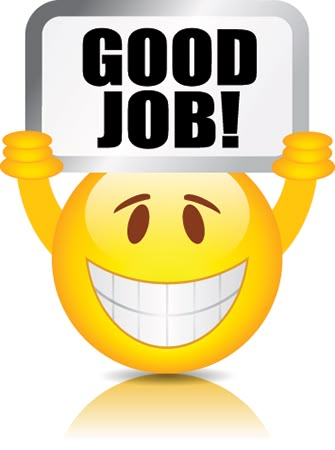

If you still have time, you could challenge yourself with these extensions **[optional]**.

# Exploration Tasks

## Task 1 Exploration
How can you improve the preference simulation? Try applying different prompting strategies from the [Lecture 5] (https://utexas.instructure.com/courses/1424111/modules/items/15305835)(e.g., adding detailed persona descriptions, chain-of-thought, in context learning) to the `system_prompt` and observe how the output changes.

## Task 2 Exploration

Analyze the cases where the LLM's rating did not match the ground truth. Are there common patterns in the errors (e.g., difficulty with sarcasm, nuanced language)? Why do you think the LLM struggles with these specific cases?

## Task 3 Exploration

In addition to pairwise and pointwise, you can use an LLM as a judge in the checklist mode. Below are the instructions for these modes using the "FocusFizz" ads. Challenge yourself to implement them.

### 1. Checklist Evaluation (PASS/FAIL Against Rules)

* Task: Judge each ad against a fixed checklist of rules.

* Checklist Rules:

    - Mentions “UT Austin” exactly once.

    - States a clear benefit (focus/concentration).

    - Tone fits (playful, crisp; not heavy meme-speak).

    - Has the exact Call to Action (CTA): "Try FocusFizz."

* Input Format: `{"ad_id":"ad_X","text":"<paste ad text here>"}`

* Output Format:

    ```

    {
    "ad_id": "ad_X",
    "checks": {
        "mentions_ut_austin_once": "PASS|FAIL",
        "states_clear_benefit": "PASS|FAIL",
        "tone_playful_crisp_not_slangy": "PASS|FAIL",
        "has_exact_cta_try_focusfizz": "PASS|FAIL"
    },
    "summary": "PASS|FAIL",
    "rationales": ["<fail reason 1>", "<fail reason 2>"]
    }
    ```